Two time series to encode and decode using SFCs.

In [1]:
signal_1 = [5,6,3,4,5]
signal_2 = [1,2,3,2,4]

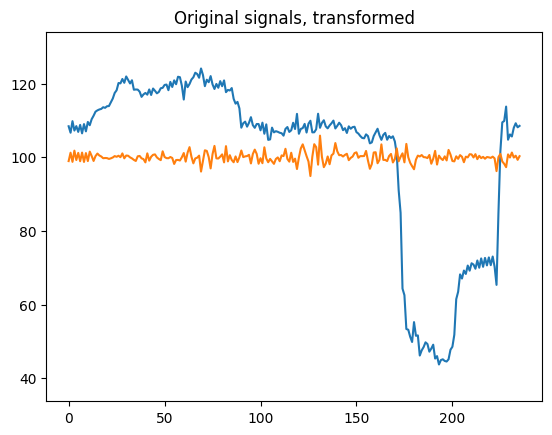

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("results/example_trajectories/emergency_braking.csv", delimiter=";")

signal_1 = (data["accel_x"]*10+100).to_list()
signal_2 = (data["accel_y"]*10+100).to_list()

padding = 10
minval = min(min(signal_1), min(signal_2)) - padding
maxval = max(max(signal_1), max(signal_2)) + padding

plt.plot(signal_1)
plt.plot(signal_2)
plt.ylim((minval, maxval))
plt.title("Original signals, transformed")
plt.show()

Demo with Morton encoding using zCurve:

In [12]:
import numpy as np
import zCurve as z

bits_per_dim = 14

morton = [z.interlace(int(x), int(y), bits_per_dim=bits_per_dim) for x, y in zip(signal_1, signal_2)]
morton_decoded = np.array([z.deinterlace(m, dims=2, total_bits=bits_per_dim) for m in morton])

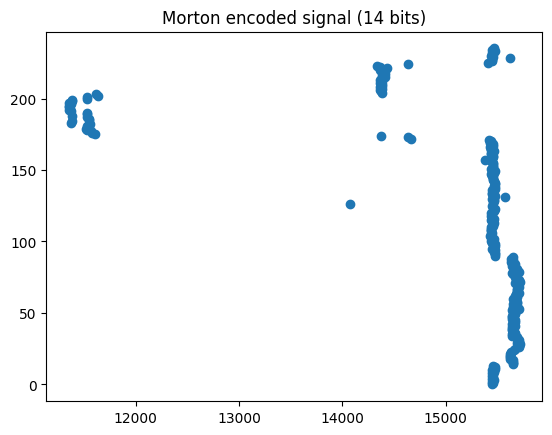

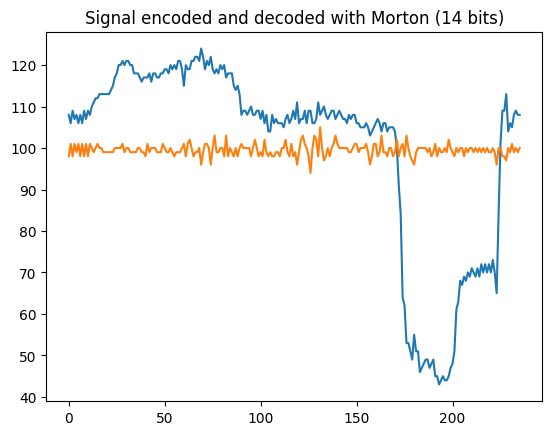

In [13]:
plt.scatter(morton, range(len(morton)))
plt.title("Morton encoded signal ("+str(bits_per_dim)+" bits)")
plt.show()

plt.plot(morton_decoded.T[0])
plt.plot(morton_decoded.T[1])
# plt.ylim((minval, maxval))
plt.title("Signal encoded and decoded with Morton ("+str(bits_per_dim)+" bits)")
plt.show()

Demo with Hilbert encoding from the hilbert library:

In [5]:
import hilbert as h

bits_per_dim = 8

hilbert = h.encode(np.ascontiguousarray(np.array([signal_1, signal_2]).T), num_dims=2, num_bits=bits_per_dim)
hilbert_decoded = h.decode(hilbert, num_dims=2, num_bits=bits_per_dim)

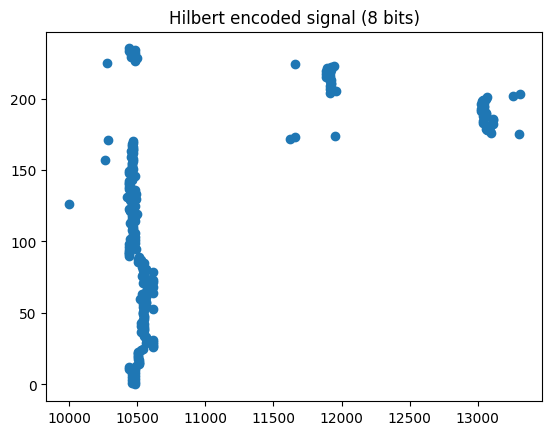

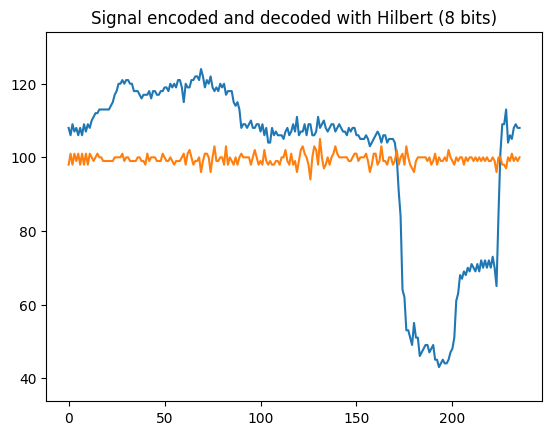

In [6]:
plt.scatter(hilbert, range(len(hilbert_decoded)))
plt.title("Hilbert encoded signal ("+str(bits_per_dim)+" bits)")
plt.show()

plt.plot(hilbert_decoded.T[0])
plt.plot(hilbert_decoded.T[1])
plt.ylim((minval, maxval))
plt.title("Signal encoded and decoded with Hilbert ("+str(bits_per_dim)+" bits)")
plt.show()

Hilbert encoding and decoding with hilbertcurve.hilbertcurve.HilbertCurve:

In [7]:
from hilbertcurve.hilbertcurve import HilbertCurve

bits_per_dim = 10

h = HilbertCurve(p=bits_per_dim, n=2)
hilbert = [h.distance_from_point([x, y]) for x, y in zip(np.array(signal_1), np.array(signal_2))]
hilbert_decoded = np.array(h.points_from_distances(hilbert))

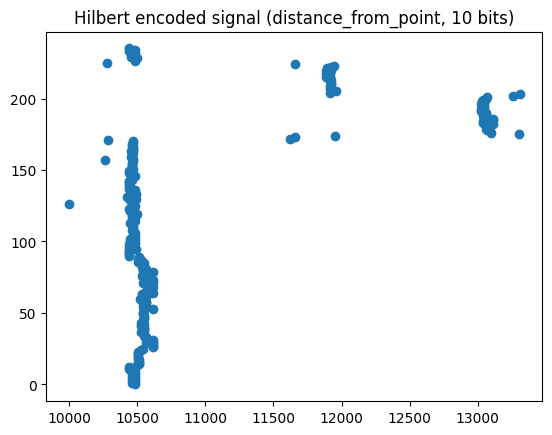

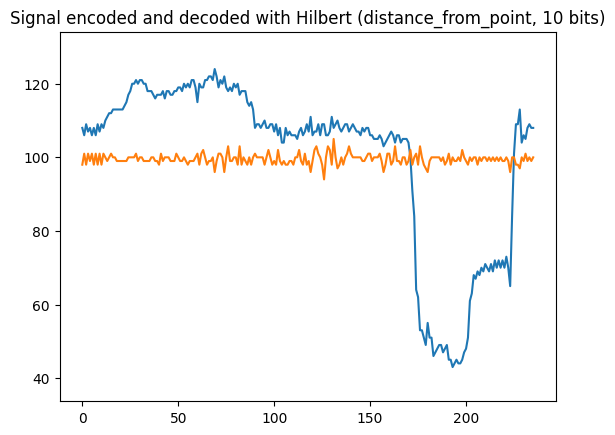

In [8]:
plt.scatter(hilbert, range(len(hilbert_decoded)))
plt.title("Hilbert encoded signal (distance_from_point, "+str(bits_per_dim)+" bits)")
plt.show()

plt.plot(hilbert_decoded.T[0])
plt.plot(hilbert_decoded.T[1])
plt.ylim((minval, maxval))
plt.title("Signal encoded and decoded with Hilbert (distance_from_point, "+str(bits_per_dim)+" bits)")
plt.show()